# 선형 모델
### 선형함수를 이용해서 출력을 예측하는 모델 

- 선형 함수란 ? X를 그대로 사용하는 함수를 말합니다
   - X 를 그대로 사용한다는 것은?
      - X 제곱 등을 사용하지 않는다는 것
   - Y 가 선의 형태를 가집니다  
   - Y= w*X + b
- 비선형 함수란? X의 제곱, 로그, 루트 등등을 적용한 함수
   - Y = w * X^2 + b

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x = np.arange(-1, 10, 0.1)

In [26]:
w = 2
b = 5
y = w * x + b #선형함수
y = w * x**2 + b #비선형함수 ** 제곱
y = w * np.sqrt(x) + b #비선형함수

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


(-2, 10)

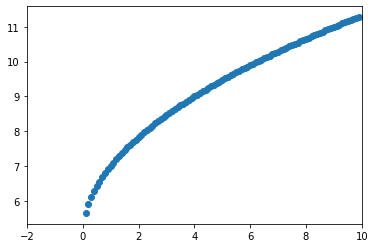

In [27]:
plt.scatter(x,y)
plt.xlim(-2, 10) # 나타낼 그래프의 최소, 최대값

In [51]:
# X 가 특징이 여러개 : 다변량 변수 
x1 = np.arange(0,10,0.2)
x2 = np.arange(5,10,0.1)
len(x1)==len(x2)

True

### 선형함수 Y = W * X + b  , 
#####  의미 : 입력데이터 X에 계수 w 곱하고 절변 b를 더하면 출력데이터가 된다
### X = [x1, x2,....x_n], W = [w1, w2,..., w_n]
### Y = w1 *x1 +  w2 * x2 + b   : 선형함수다
### Y = w1 *x1**2 +  w2 * x2 + b   : 제곱이 있으므로 비선형함수다

In [52]:
w1, w2, b = 0.2, 0.7, 1

In [53]:
y = w1 * x1 + w2 * x2 + b# 선형함수 y 는 선으로 나타납니다
#y = w1 * x1**2 + w2 * x2 + b# 비선형함수는 y가 비선(곡선)으로 나타납니다

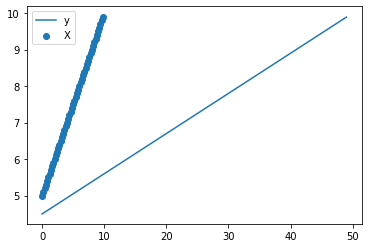

In [54]:
plt.scatter(x1,x2, label='X')
#plt.xlabel='x1'
#plt.ylabel='x2'
plt.plot(y, label='y') 
plt.legend()

#### 나이와 키를 선형 함수로 모델링 해보자
X : 사람의 나이 
Y : 사람의 키 

In [154]:
x = [1, 5, 10, 15, 20, 25, 30] #나이
y = [55, 110, 140, 160,175, 176, 176] #키
x_test = [3, 12, 23, 33] # 이 사람들의 키를 알고 싶어요

X = np.array(x).reshape([-1,1])# 2차원으로 변환 (데이터갯수, 특징수)
y = np.array(y)
x_test = np.array(x_test).reshape([-1,1])
X.shape, y.shape, x_test.shape

((7, 1), (7,), (4, 1))

In [155]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2).fit(X,y)

In [156]:
model.predict(x_test)

array([ 82.5, 150. , 175.5, 176. ])

In [225]:
w = 3.8
b = 84
p = w * np.arange(0,35) + b # Y = WX + b

In [226]:
# 오차 측정  y - y^   : 오차의 제곱의 평균
y_hat = w * X + b # 선형 모델의 키 예측
np.sum( (y - y_hat[:, 0])**2 ) / len(y)

361.12

In [251]:
#Greedy search 탐욕적 탐색, 원래는 정규 방정식으로 최선의 w와 b를 찾습니다
#못쓰는 이유 : 오래걸려서 못쓴다
cost_min = 10000000
for c in np.arange(3, 4, 0.1):
    for b in np.arange(50, 100, 0.1):
        y_hat = c * X + b # 선형 모델의 키 예측
        cost = np.sum( (y - y_hat[:, 0])**2 ) / len(y)        
        if cost < cost_min:
            cost_min = cost
            w_min = c # 변경이 아니고 찾았다
            b_min = b        
w_min, b_min, cost_min

(3.81899999999991, 83.90000000000049, 361.04931942857144)

In [252]:
#정규방정식으로 최선의 w와 b 를 찾기
#못쓰는 이유: 메모리 부족때매 못씁니다.
from sklearn.linear_model import LinearRegression #선형 회귀
model = LinearRegression().fit(X,y)
model.coef_, model.intercept_

(array([3.82091141]), 83.8547700170358)

In [262]:
#Stochastic Gradient Descent : 딥러닝에서 사용하는 방법
#가능한 이유 : 데이터를 작게 나눠서(배치) 반복적으로 파라미터를 업데이트
from sklearn.linear_model import SGDRegressor
model = SGDRegressor().fit(X,y)
model.coef_, model.intercept_
w = model.coef_
b = model.intercept_
p = w * np.arange(0,35) + b

In [263]:
age = 19
height = w * age + b # 19살 청년의 키는 ? 
height

array([219.94270445])

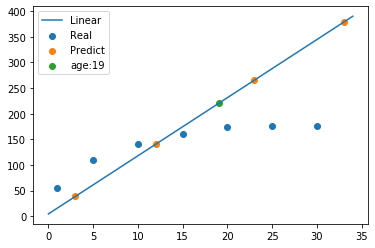

In [264]:
plt.scatter(x, y, label='Real')
plt.scatter(x_test, model.predict(x_test), label='Predict')
#plt.scatter(x, p, label='Linear')
plt.scatter(age, height, label='age:19')
plt.plot(p, label='Linear')
plt.legend()

# 세계 행복 지수 예측하기
### 출력 (y) : 행복수준(0~10사이의 실수)
### 입력 (GDP, 건강, 가족관계, 자유도, 청렴도 등등)

1. 데이터를 읽어서, 정제(cleaning:누락, 이상치 제거)
1. 입력X 과 출력 y 분리  
   - .iloc[2:4, 2:4] , drop, ['컬럼선택'] 등을 사용
   - 입력 X 는 수치데이터만 사용하세요
1. 모델 선택
   - LinearRegression , SGDRegressor 와 같은 선형 모델 사용
   - 선형모델에는 계수 W 와 절편 b 가 있는데 이것이 핏팅됩니다

In [266]:
import pandas as pd
df = pd.read_csv('./datasets\world-happiness-report/2017.csv')
df.shape # 데이터의 양 확인

(155, 12)

In [272]:
df.head(1) # 컬럼명 누락, 인코딩 문제

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [276]:
df.isna().sum().sum() # 누락확인

0

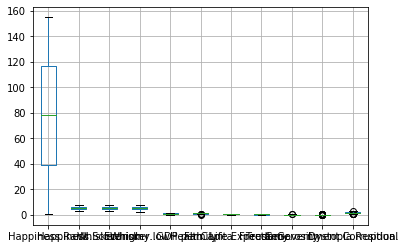

In [310]:
df.boxplot() #이상치확인

In [314]:
df.iloc[:, 2:5].corr()

,Happiness.Score,Whisker.high,Whisker.low
Happiness.Score,1.000000,0.999497,0.999520
Whisker.high,0.999497,1.000000,0.998036
Whisker.low,0.999520,0.998036,1.000000


In [315]:
y = df['Happiness.Score']
x = df.iloc[:, 5:] # 모든 행, 3열부터 끝까지
x.shape, y.shape

((155, 7), (155,))

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, 
                                                    random_state=42)
X_train.shape, X_test.shape

((103, 7), (52, 7))

결정 계수 R**2 
시험 만점 100 / 예측을 50이라고 하면 결정 계수 0

In [317]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor().fit(X_train,y_train)
# 예측 성능은 결정계수로 평가합니다 1이 최선 0 평균정도 예측가능
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9595330840778229, 0.9599114356176315)

In [329]:
(df['Country']=="South Korea").sum()

1

In [331]:
cond = df['Country']=='South Korea'
korea = df[cond]
korea

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
54,South Korea,55,5.838,5.922559,5.753441,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378


In [333]:
model.predict(korea.iloc[:, 5:]) #한국 통계치로 본  행복지수 예측

array([5.93086117])

In [337]:
# Y = WX + B
np.sum(model.coef_ * np.array(korea.iloc[:, 5:])) + model.intercept_

array([5.93086117])

In [318]:
model.coef_.shape

(7,)

In [319]:
#행복지수에 영향을 미치는 요인을 분석해보자
happy = pd.DataFrame(data=model.coef_, index=x.columns)

In [320]:
happy.sort_values(0, ascending=False)

,0
Economy..GDP.per.Capita.,1.087898
Dystopia.Residual,1.016203
Family,1.001870
Health..Life.Expectancy.,0.606323
Freedom,0.423372
Generosity,0.286360
Trust..Government.Corruption.,0.212895


# 유방암 진단 데이터
#### 병원에서  유방암이 의심되는 환자들의 진단 검사를 통해 악성인지 양성인지를 분류

## 분류   X 가 0이냐 1이냐
### 예측 후 분류    X  >   1일 확률 0.6 > 반올림
#### 그러므로 예측 모델이나 분류 모델이나 원리는 같습니다

In [338]:
from sklearn.datasets import load_breast_cancer

In [341]:
x,y = load_breast_cancer(return_X_y=True)
x.shape, y.shape

((569, 30), (569,))

In [346]:
data = load_breast_cancer() # 딕셔너리 같은 데이터

In [353]:
x = data.data
y = data.target

In [378]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, 
                                                    random_state=42)
X_train.shape, X_test.shape
from sklearn.linear_model import SGDRegressor, SGDClassifier, LinearRegression
model = SGDClassifier().fit(X_train,y_train)
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9028871391076115, 0.9414893617021277)

In [373]:
model = SGDRegressor().fit(X_train,y_train)
np.mean(model.predict(X_train)) #fit 실패, 원인은 데이터 정규화 안해서 

1297492060150629.8

In [377]:
model = LinearRegression().fit(X_train,y_train)
np.mean(model.predict(X_train))

0.6194225721784765

In [354]:
df = pd.DataFrame(data=x, columns=data.feature_names)
df.shape

(569, 30)

In [355]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
